# Problem Set 3, due Wednesday, May 3rd, 5:30pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [1]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy
from scipy import stats


pro = pd.read_csv("/Users/nandy/Downloads/progresa_sample.csv.gz")
print(pro.head(3))

print("Progresa levels:",pro.progresa.unique())
print("Count by Progresa level:",pro.groupby(['progresa'])['age'].count().reset_index(name="count"))

print("\nPoor levels:",pro.poor.unique())
print("Count by Poor level:",pro.groupby(['poor'])['age'].count().reset_index(name="count"))

y=pd.DataFrame({
                'Mean':pro[['progresa','age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97','poor']].mean(),
               'Standard dev.':pro[['progresa','age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97','poor']].std(),
                'Missing values':pro[['progresa','age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97','poor']].isnull().sum()          
               })
print(y)


   year  sex  indig  dist_sec   sc  grc  fam_n   min_dist   dist_cap   poor  \
0    97  0.0    0.0     4.473  1.0  7.0      7  21.168384  21.168384  pobre   
1    98  0.0    0.0     4.473  1.0  8.0      7  21.168384  21.168384  pobre   
2    97  1.0    0.0     4.473  1.0  6.0      7  21.168384  21.168384  pobre   

   ...  hohedu  hohwag  welfare_index  hohsex  hohage  age  village  folnum  \
0  ...       6     0.0          583.0     1.0    35.0   13      163       1   
1  ...       6     0.0          583.0     1.0    35.0   14      163       1   
2  ...       6     0.0          583.0     1.0    35.0   12      163       2   

   grc97  sc97  
0      7   1.0  
1      7   1.0  
2      6   1.0  

[3 rows x 21 columns]
Progresa levels: ['0' 'basal']
Count by Progresa level:   progresa  count
0        0  29690
1    basal  47560

Poor levels: ['pobre' 'no pobre']
Count by Poor level:        poor  count
0  no pobre  11858
1     pobre  65392
                     Mean  Missing values  Standard 

Progresa has 2 levels - 0 & basal
Poor has 2 levels - pobre and no pobre
In the summary table, Poor & Progressa has NaN as it is a categorical variable

### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

I suggest you to use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for poor.

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [2]:
# your code here
pro.poor.unique()
pro['poor_num'] = np.where(pro['poor']=='pobre', 1, 0)

#Calculate metrics for Poor & Treatment
y1 = pro[(pro.poor=='pobre')& (pro.progresa=='basal') & (pro.year==97)]
y2=pd.DataFrame({'Mean_treat':y1[['age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97']].mean(),
                'Variable':['age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97'],
                'Count_treat':y1[['age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97']].count()
                })

#Calculate metrics for Poor & Control
y3 = pro[(pro.poor=='pobre')& (pro.progresa!='basal')& (pro.year==97)]
y4=pd.DataFrame({'Mean_control':y3[['age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97']].mean(),
                'Variable':['age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97'],
                 'Count_control':y3[['age','sex', 'indig', 'dist_sec', 'sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','grc97','sc97']].count()
                })

#Join the two tables based on variables
y5 = pd.merge(y2, y4, left_index=True, left_on='Variable',right_on='Variable')

#Rearrange columns
y5 = y5[['Variable', 'Mean_treat', 'Mean_control','Count_treat','Count_control']]

#Find difference between means
y5['difference']=y5['Mean_treat']-y5['Mean_control']

#Subset the data to satisfy the question requirement
xf=0
pval=list()
for xf in range(0,len(y5.Variable)):
    r1= y1.loc[:,y5.Variable[xf]]
    r2= y3.loc[:,y5.Variable[xf]]
    t2,p2=(scipy.stats.ttest_ind(r1.dropna(), r2.dropna()))
    pval.append(p2)
    xf=xf+1
    
y5['pval']=pval
y6=y5[['Variable', 'Mean_treat', 'Mean_control','difference','pval']]
print(y6)


                    Variable  Mean_treat  Mean_control  difference  \
age                      age   10.716991     10.742023   -0.025032   
sex                      sex    0.519317      0.505052    0.014265   
indig                  indig    0.325986      0.332207   -0.006222   
dist_sec            dist_sec    2.453122      2.507662   -0.054540   
sc                        sc    0.822697      0.815186    0.007511   
grc                      grc    3.531599      3.543050   -0.011450   
fam_n                  fam_n    7.281327      7.302469   -0.021142   
min_dist            min_dist  107.152915    103.237854    3.915060   
dist_cap            dist_cap  150.829074    153.769730   -2.940656   
hohedu                hohedu    2.663139      2.590348    0.072791   
hohwag                hohwag  544.339544    573.163558  -28.824015   
welfare_index  welfare_index  655.428377    659.579100   -4.150723   
hohsex                hohsex    0.924656      0.922947    0.001709   
hohage              

### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 

Only variables such as age,indig,grc,fam_n, hohsex,grc97 have no statistical difference. Other variables are different between the treatment and control villages

* B: Why does it matter if there are differences at baseline?

It is important that the baselines are not different, as it would confirm that the treatment and control data sets are not different and any difference in population might be only due to the treatment. It would mean that with all variables being constant, the impact is only due to treatment. 



* C: What does this imply about how to measure the impact of the treatment?

As we have some variables failing T test, we need to be cautious when using such variables in models. 
This implies that, any change observed is not only due to the impact of treatment. 



### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

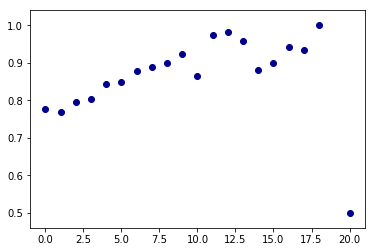

In [3]:
#Subset the data for year 1997
y1 = pro[(pro.year==97)]
x=pd.DataFrame(y1.groupby(['hohedu'])['sc97'].mean().reset_index(name='Average_enrollment_rate'))
plt.scatter(x['hohedu'],x['Average_enrollment_rate'],color='darkblue')

The scatterplot depicts that with increase in educational level, the enrollment rate increases. This might imply that well educated households pay more attention towards education. 

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

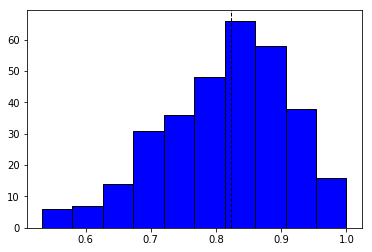

In [4]:
# Your code here
#Subset for 1997(before treatment and poor families )
y1 = pro[(pro.year==97)&(pro.poor=='pobre') &(pro.progresa=='basal')]
x=pd.DataFrame(y1.groupby(['village'])['sc97'].mean().reset_index(name='Average_enrollment_rate'))
plt.hist(x['Average_enrollment_rate'].dropna(), color = 'blue', edgecolor = 'black')
#print(y1['sc97'])
plt.axvline(y1['sc97'].mean(), color='k', linestyle='dashed', linewidth=1)

-2.6365121429171556 0.008379519936799229


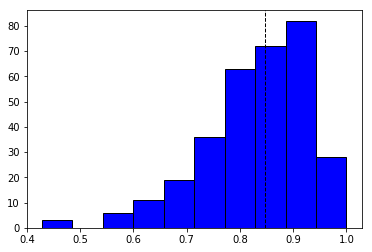

In [5]:
y2 = pro[(pro.year!=97)&(pro.poor=='pobre') &(pro.progresa=='basal')]
x=pd.DataFrame(y2.groupby(['village'])['sc'].mean().reset_index(name='Average_enrollment_rate'))

plt.hist(x['Average_enrollment_rate'].dropna(), color = 'blue', edgecolor = 'black')
plt.axvline(y2['sc'].mean(), color='k', linestyle='dashed', linewidth=1)

t2, p2 = scipy.stats.ttest_ind_from_stats(y1['sc97'].mean(), np.sqrt(y1['sc97'].mean()), len(y1['sc97']),y2['sc'].mean(), np.sqrt(y2['sc97'].mean()), len(y2['sc']),equal_var=False)
print(t2,p2)

The mean of enrollment rate after treatment has increased from before treatment. The difference is also statistically significant as p value is less than .05

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [6]:
#Filter the dataset only for poor and in year 1998
y3 = pro[(pro.poor=='pobre')&(pro.year==98)]

#Find average enrollment rate after the trearment (1998) in treatment and control villages
y3.groupby(['progresa'])['sc'].mean().reset_index(name='Average_enrollment_rate')

print(scipy.stats.ttest_ind(y3[(y3['progresa'] =='basal')].dropna().sc, y3[(y3['progresa'] !='basal')].dropna().sc))


Ttest_indResult(statistic=8.101650305300375, pvalue=5.656455605358843e-16)


The difference is statistically significant. Hence we can conclude based on this result that there was a difference in enrollment rate between villages that were in treatment and control. 

This implies that the enrollment rate is different. This might be due to the program or due to the other factors which were different between the population

### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [12]:
# Your code here
import statsmodels.formula.api as smf

#y3 has only poor and 98 data
m1=smf.ols(formula='sc ~ progresa ', data=y3)
r1=m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 02 May 2018   Prob (F-statistic):           6.64e-17
Time:                        13:46:18   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000       0.800       0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The model suggests that progresa increases the likelihood of enrollment by .0388. So it would mean that, even if not enrolled in Progresa, the enrollment rate is .8076, and if they have gone through Progresa, then enrollment rate reaches .8464(.8076+.0388) 

2. The regression estimate and t test estimates are close.

3. As the Progresa variable is significant, we can reject the Null hypothesis and state that the Progresa indeed has impact on enrollment rate.

4. Basis of this regression analysis was to check whether Progresa has any impact on enrollment rate and model states -yes. 

Model says that Progresa had positive impact on enrollment rate. The counterfactual statement could be that only families with low chance of enrollment rate are not selected for Progresa program. Or Government is holding a different initiative, where it is providing enrollment assistance and progresa progam for poor people at the same time.


### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [13]:
# Your code here
m1=smf.ols(formula='sc ~ progresa+ sex+indig+grc+min_dist+dist_cap+hohedu+age', data=y3)
r1=m1.fit()
r1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     1477.
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        13:46:22   Log-Likelihood:                -7003.5
No. Observations:               27280   AIC:                         1.403e+04
Df Residuals:                   27271   BIC:                         1.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6282      0.011    143.901      0.000       1.606       1.650
progresa[T.basal]     0.0332      0.004      8.470      0.000       0.025       0.041
sex                   0.0337      0.004      8.879      0.000       0.026       0.041
indig                 0.0240      0.005      5.232      0.000       0.015       0.033
grc                   0.0521      0.001     35.856      0.000       0.049       0.055
min_dist              0.0003    6.2e-05      4.947      0.000       0.000       0.000
dist_cap              0.0002   3.59e-05      6.385      0.000       0.000       0.000
hohedu                0.0049      0.001      6.438      0.000       0.003       0.006
age                  -0.1009      0.001    -84.748      0.000      -0.103      -0.099
==============================================================================
Omnibus:                     3287.615   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4619.760
Skew:                          -0.954   Prob(JB):                         0.00
Kurtosis:                       3.653   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Initially the model included all the other variables, but I have removed the variables which were not significant. I have also not considered interaction effect in this model.
*The impact of progresa variable is still around .03, but we have other variables in the model with positive or negative coefficients
*Only age has negative impact, as the age increases, the enrollment rate decreases

1. The controls have impacted the progresa's coefficient slightly, and the intercept value has changed. And with addition of new controls, when we look at prediction of enrollment rate, it is better when compared to the previous model.
2. The standard error for the Progresa variable has dropped by .001. Even the model's R square has increased from .003 to .30 which is a really huge jump.
3. The progresa estimates are close, but intercept has changed drastically between 2.2 and 2.3. As the R square has increased in 2.3, the model can be read and interpreted better in 2.3(Which also implies that the change in enrollment rate is not restricted only to Progreso programme).


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [14]:
# Your code here
ym = pro.groupby(['year', 'progresa']).sc.mean().reset_index()
print(ym)

cs1=ym.iat[3,2]-ym.iat[1,2]
print("Difference between 1997 and 1998 in treated village:",cs1)
cs2=ym.iat[2,2]-ym.iat[0,2]
print("Difference between 1997 and 1998 in control village:",cs2)
d=cs1-cs2
print("Difference in difference:",d)

#Otherway to calculate dif in dif
cs1=ym.iat[1,2]-ym.iat[0,2]
print("\n\nSecond type of dif in dif:\nDifference between treated and controlled in 1997:",cs1)
cs2=ym.iat[3,2]-ym.iat[2,2]
print("Difference between treated and controlled in 1998:",cs2)
d=cs2-cs1
print("Difference in difference:",d)


   year progresa        sc
0    97        0  0.806578
1    97    basal  0.818495
2    98        0  0.802917
3    98    basal  0.841182
Difference between 1997 and 1998 in treated village: 0.02268638643289378
Difference between 1997 and 1998 in control village: -0.0036609043082972414
Difference in difference: 0.02634729074119102


Second type of dif in dif:
Difference between treated and controlled in 1997: 0.011917783712771635
Difference between treated and controlled in 1998: 0.038265074453962655
Difference in difference: 0.02634729074119102


In the regression model, I have compared the enrollment rate between the treated and control villages in the year of 1998(which is similar to crosssectional analysis & not before -after analysis). I have not compared the increase in enrollment rate between the years 1997 and 1998 for in the model. So the results cannot be compared directly.

To compare the diff in diff results with the model, I had done the dif in dif analysis in a different way and found that the model coefficient match.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [15]:
m2=smf.ols(formula='sc ~ progresa* C(year)+ sex+indig+grc+min_dist+dist_cap+hohedu+age', data=pro)
r2=m2.fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     3126.
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        13:46:30   Log-Likelihood:                -18834.
No. Observations:               68468   AIC:                         3.769e+04
Df Residuals:                   68457   BIC:                         3.779e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.6121      0.007    222.370      0.000       1.598       1.626
progresa[T.basal]                   0.0071      0.003      2.065      0.039       0.000       0.014
C(year)[T.98]                       0.0258      0.004      6.537      0.000       0.018       0.034
progresa[T.basal]:C(year)[T.98]     0.0248      0.005      4.948      0.000       0.015       0.035
sex                                 0.0365      0.002     14.962      0.000       0.032       0.041
indig                               0.0271      0.003      8.964      0.000       0.021       0.033
grc                                 0.0524      0.001     56.960      0.000       0.051       0.054
min_dist                            0.0002   4.01e-05      6.059      0.000       0.000       0.000
dist_cap                            0.0003   2.35e-05     10.731      0.000       0.000       0.000
hohedu                              0.0046      0.000      9.817      0.000       0.004       0.006
age                                -0.1017      0.001   -134.822      0.000      -0.103      -0.100
==============================================================================
Omnibus:                     6629.764   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8711.104
Skew:                          -0.851   Prob(JB):                         0.00
Kurtosis:                       3.397   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. With other controls in the model, impact of Progresa has reduced, but it is still significant.
2. This change in variable coefficient is because of presence other controls' with relationship enrollment rate.
3. Only the variables with p value <.05 and t stat >2 are retained in the model.
4. Diff in Diff estimate(0.0248) is close to the interaction variable(.0248).
5. Comparing the result with simple differences, the t test value has reduced (May be because of other controls)
6. Comparing the result with dif in dif, only the dif in dif is the same, both year & Progresa variables' effect is not similar(2.4)

To answer counterfactual question:
1. Progresa & Year have positive impact on enrollment rate - program was really effective and in addition with other variables it is impacting enrollment rate.
2. Enrollment rate to have impact on year, is difficult to explain. But eagerness to enrol, might have had impact on min_dist
3. The families might have received benefits from a different program or schools were made free for poor families. Hence progresa and enrollment rate might be having a positive impact as a side effect

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

1. The Progresa program does seem like it has made an impact in enrolment rate - analysis such as histogram by village helped us track that. 
2. But this progresa programme is not the only cause of enrollment. We have observed that there is significant difference between the treatment and control groups. Maybe the underlying population itself had effect on the results.
3. We also observed that the model works better with additional variables instead of just the Progresa as the impact.
4. My take on this program is: It looks like Progresa has had impact on enrollment, but whether it was worth the effort taken - ROI of this programme needs to be evaluated, to see whether the targeted result was acheived.  